<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Classification-Machine-Learning-Module:-Particles" data-toc-modified-id="Classification-Machine-Learning-Module:-Particles-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Classification Machine Learning Module: Particles</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Imports</a></span></li></ul></li></ul></li><li><span><a href="#Data-Exploratory-Analysis" data-toc-modified-id="Data-Exploratory-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Exploratory Analysis</a></span><ul class="toc-item"><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Feature Selection</a></span></li></ul></li><li><span><a href="#Analysis/Modeling" data-toc-modified-id="Analysis/Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analysis/Modeling</a></span><ul class="toc-item"><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#Results" data-toc-modified-id="Results-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Results</a></span></li><li><span><a href="#Conclusions-and-Next-Steps" data-toc-modified-id="Conclusions-and-Next-Steps-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusions and Next Steps</a></span></li></ul></div>

# Classification Machine Learning Module: Particles

The purpose of this notebook is to teach CMS students and high school teachers interested in the field of Machine Learning. CMS students are doing vast research on physics where Machine Learning can help them to find interesting insights. 

### Imports
Import libraries and write settings here.

In [6]:
# Data manipulation
import pandas as pd
import numpy as np
# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython import get_ipython
import matplotlib.pyplot as plt
import seaborn as sns
ipython = get_ipython()
# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload
%autoreload 2


# Data Exploratory Analysis 

In [4]:
data = pd.read_csv("pid-5M.csv")
data.head()

,id,p,theta,beta,nphe,ein,eout
0,211,0.780041,1.081480,0.989962,0,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,4,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0,0.034379,0.049256


* id = Particle ID
    * -11 = positron
    * 211 = pion
    * 321 = kaon
    * 2212 = proton
* p = Momentum (GeV/c)
* thetha (rad)
* nphe = number of photoelectrons 
* ein = inner energy (GeV)
* eout = outer energy (GeV)

In [5]:
data.describe()

,id,p,theta,beta,nphe,ein,eout
count,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,9.941839e+02,1.230053e+00,4.889321e-01,8.995796e-01,3.575243e+00,5.635883e-02,7.033195e-02
std,9.724034e+02,7.414895e-01,2.942161e-01,1.132321e-01,1.779236e+01,7.882675e-02,1.020604e-01
min,-1.100000e+01,2.101170e-01,9.222140e-02,5.500010e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.110000e+02,6.657510e-01,2.817420e-01,8.378760e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.110000e+02,1.066150e+00,4.048670e-01,9.461940e-01,0.000000e+00,3.442440e-02,4.417490e-02
75%,2.212000e+03,1.649650e+00,6.117800e-01,9.855910e-01,0.000000e+00,6.834520e-02,9.365990e-02
max,2.212000e+03,5.286950e+00,2.219270e+00,1.499590e+00,3.490000e+02,8.993820e-01,1.097410e+00


Text(0.5, 0, 'Momentum of Particles')

Text(0, 0.5, 'Feature Value')

Text(0.5, 1.0, 'Momentum Distribution')

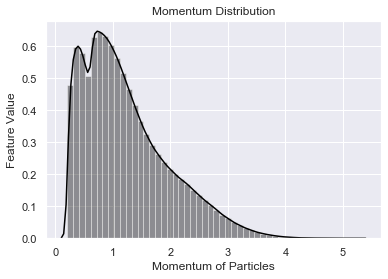

In [9]:
sns.set(style='darkgrid')
sns.distplot(data['p'], hist=True, kde=True, color='black')
plt.xlabel('Momentum of Particles')
plt.ylabel('Feature Value')
plt.title('Momentum Distribution')

Text(0.5, 0, 'Momentum of the Particle')

Text(0, 0.5, 'beta angle')

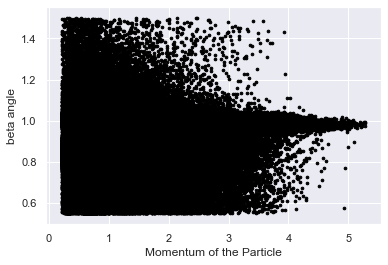

In [12]:
f1 = data['p'].values
f2 = data['beta'].values
plt.scatter(f1, f2, c='black', s=7)
plt.xlabel('Momentum of the Particle')
plt.ylabel('beta angle')

## Feature Selection

Feature selection is a technique that it is utilized to choose the better attributes to predict our label. In this case, we want to predict the particle which correspondes these attributes. Therefore, by making a correlation matrix and heatmap, we will be able to pick the better attributes to get a more accurate prediction. 

In [10]:
corr_matrix = data.corr()
corr_matrix["id"].sort_values(ascending=False)

id       1.000000
p        0.246671
ein      0.195337
eout     0.191691
nphe    -0.069543
theta   -0.300734
beta    -0.729059
Name: id, dtype: float64

<b> The correlation matrix tell us that the features that are more correlated to the particle are beta, theta, and momentum. This correlation is determined by which features are closest to one, positive and negative. </b>

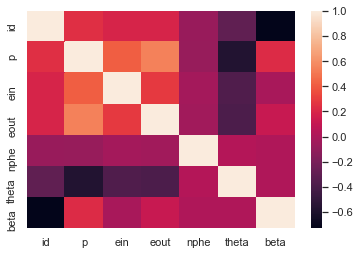

In [11]:
#correlation heat map
sns.set(style='darkgrid')
corr = data[['id', 'p','ein', 'eout','nphe', 'theta', 'beta']].corr()
sns.heatmap(corr)

In [18]:
data_copy = data.copy()
data_copy.drop("nphe", inplace=True, axis=1)
data_copy.head()

,id,p,theta,beta,ein,eout
0,211,0.780041,1.081480,0.989962,0.000000,0.000000
1,211,0.260929,0.778892,0.902450,0.000000,0.000000
2,2212,0.773022,0.185953,0.642428,0.101900,0.000000
3,211,0.476997,0.445561,0.951471,0.000000,0.000000
4,2212,2.123290,0.337332,0.908652,0.034379,0.049256


# Analysis/Modeling
***

<b> Before we implement a classification model, we divide our data in: </b>
* Features: Features are the attributes we are going to use to predict the particle. In this case, these are momentum, theta, beta, ein and eout. 
* Label: Label is the thing we are going to predict based on the features. In this case, we are predicting the particle. 

In [ ]:
features = data_copy.drop('id', axis=1)
labels = data_copy['id']

<b> In addition, we also have to split our data set for training and testing purposes. </b>
* Train set: This is the block of data we are going to use to train the model. The model will learn based on this training data and the values provided in it. The data is the core of the model, if we have good and enough data points, the model will have a good perfomance and accuracy. 
* Test set: To test the perfomance of our model in data it have not seen before, we must provide a test set which will help us determine how good the model is predicting new data. 

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.22, random_state = 1)

In [21]:
y_train.unique()

array([ 211, 2212,  321,  -11], dtype=int64)

## XGBoost

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
pred_xgb = xgb.predict(x_test)
print('accuracy score:', accuracy_score(y_test, pred_xgb))

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

accuracy score: 0.9713327272727272


## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
clf_rfc = RandomForestClassifier()
clf_rfc.fit(x_train, y_train)
pred_rfc = clf_rfc.predict(x_test)
print('accuracy score:', accuracy_score(y_test, pred_rfc))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

accuracy score: 0.9705618181818182
